# Predicting Customer Churn in Telecom
## Data-Driven Insights for Customer Retention Strategies

## Business Understanding
In 2024, ABC Telecommunication Company, a startup telecom provider, reported a churn rate of approximately 26% out of its 6,978 active customers. This translates to about 1815 customers leaving within a year, which resulted in an estimated revenue loss of $2.4 million.

Analysis of historical data revealed that customers who churned were primarily on a month-to-month contracts and faced higher monthly charges compared to those who stayed.


### Key Factors Contributing to Churn
1. Lack of long-term contracts made it easy for customers to switch to competition due to absence of binding agreements.
2. High service charges and international calling plans which led to dissatisfaction and increased the likelihood of leaving.
3. Poor customer support experiences with frequent complaints and unresolved issues weakened customer loyalty.


### Stakeholders
- **Marketing and Customer Retention Teams** responsible for designing targeted campaigns and retention strategies.
- **Product and Pricing Teams** will adjust plans, pricing and packages based on churn insights.
- **Customer Service Department** responsible for addressing issues and improving support quality for at-risk customers.
- **Executive Leadership** will use predictive insights to make strategic decisions and reduce revenue loss.


### Problem Statement
ABC Telecommunication Company is experiencing a high churn rate of 26% resulting in a significant revenue loss of $2.4 million annually. This threatens the company's growth and long-term sustainability.

This project aims to:
- Identifying customers who are likely to churn through predictive modeling.
- Uncovering the key factors driving churn, such as monthly charges, contract type and the quality of support services.
- Providing actionable insights that will enable the company to design targeted retention strategies, reduce churn and improve customer loyalty.


### Objectives
1. To proactively identify customers at high risk of churn.
2. Determine the key drivers contributing to churn. 
3. Provide actionable recommendations to reduce churn and increase customer retention.


### Metric of Success
The project will be considered successful if :

1. Key factors that contribute to customer churn ABC Telecom are identified.
2. A predictive model is developed with strong performance on the test dataset.
3. Target model performance meets or exceeds the following metrics:
- Accuracy >= 85% considering class imbalance.
- Recall >= 80% to correctly identify the majority of churners, critical for retention.
- Precision >= 80% ensuring predictions arereliable, minimizing false alarms.
- F1-Score >= 80% which provides a balance between precision and recall.
- ROC-AUC >= 0.85 to measure the models ability to distinguish churnes and non-churners across thresholds.


## Data Undestanding

To explore what drives customer churn in the telecom industry, we are using `SyriaTel Customer Churn` dataset from Kaggle. This dataset contains 3333 customer records and 21 features, capturing customer-level information such as usage and charges, customer service calls, international and voicemail plans and churn behavior.

Below is an overview of the dataset and the structure of the data it contains.

1. `state`: The U.S. state where the customer lives.
2. `account length`: Duration (in months) the customer has had the account.
3. `area code`: The telephone area code of the customer.
4. `phone number`: Customer's phone number(acts as identifier-not useful for prediction).
5. `international plan`: Whether the customer has an international calling plan(yes or no)
6. `voicemail plan`: Whether the customer has a voicemail plan(yes or no)
7. `number vmail messages`: Number of voicemail messages.
8. `total day minutes`: Total minutes of calls made during the day.
9. `total day calls`: Total number of calls made during the day.
10. `total day charge`: Total charge for day calls (minutes * rates)
11. `total eve minutes`: Total minutes of calls made during the evening.
12. `total eve calls`: Total number of calls made during the evening.
13. `total eve charge`: Total charge for evening calls (minutes * rates)
14. `total night minutes`: Total minutes of calls made during the night.
15. `total night calls`: Total number of calls made during the night.
16. `total night charge`: Total charge for night calls (minutes * rates)
17. `total intl minutes`: Total minutes of international calls.
18. `total night calls`: Total number of international calls made.
19. `total night charge`: Total charge for international calls(minutes * rates)
20. `customer service calls`: Number of times the customer called customer service.
21. `Churn`(Target variable): Whether the customer left the company(1 = churn) or stayed(0 = churn)

This dataset enables us to analyze customer behaviors, identify churn patterns and prepare features for building predictive models.

### Data Relevance

The dataset is relevant because its features directly relate to factors influencing **customer churn** in the telecom industry. For Example:
- **Usage and charges** features(e.g, total day minutes, total eve calls, total night charge) provide measurable insights into customer behavior and spending patterns.
- **Customer service calls** is a practical indicator of dissatisfaction and a strong link to churn.
- **International and voicemail plan** features capture optional services that may affect customer satisfaction and churn decisions.
- **Churn**, the target variable (0 = stayed, 1 = left) is aligned with business objective of predicting customer loss.

Overall, this dataset provides valid and industry-relevant features which make it highly suitable for analyzing churn behavior and building predictive models to address the company's business problem.

In [100]:
# Importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import re 

# Importing sklearn libraries 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
from collections import Counter 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score, \
      roc_curve, auc, recall_score, precision_score,f1_score

In [101]:
# Loading and reading the first five rows of the dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [102]:
# Checking the last five rows of the dataset
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


The dataset values are uniform from top to bottom

In [103]:
# Checking the shape
print(f"The dataset has {data.shape[0]} customer records with {data.shape[1]} features")

The dataset has 3333 customer records with 21 features


In [104]:
# Checking for general information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset comprises of 16 numerical features and 4 categorical features and 1 boolean target feature-Churn.

In [105]:
# Checking for statistical summary
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Observation.
The dataset contains 3333 customers.
- On average, most customers stays for approximately 101 days, some stayed only for a day while others stayed for 243 days.
- Usage is  highest in the evening and night with an average usage of approximately 201 minutes.
- However, day usage has lower average mean at 180 minutes and the charges compared to evening and night for the calls are higher, making it a potential churn factor.
- Voicemail is rarely used, having a median of 0 messages. 
- International calls also are not frequent as seen above, with a mean number of calls at around 4 and a maximum of 20 calls and the mean minutes at approximately 10 minutes and maximum of 20. Customers with international plans may be prone to churn as well.
- Customer service calls average 1.5 calls. Some customers contact support up to 9 times as seen, indicating high risk of churn.

In [106]:
# Checking statistical summary of categorical features
data.describe(include="object")

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,400-4344,no,no
freq,106,1,3010,2411


Observation
- There are 51 states covered with West Virginia-WV being the most frequent with 106 customers. The number is quite small suggesting that no state dominates much.
- Phone number is a personal identifier and unique per customer, hence will be excluded during modeling.
- International plan is highly imbalanced, with 90% of the customers who have not subscribed to it.Billing costs for international plans are always high and may be the reason to low subscription, hence a strong churn predictor.
- Voice mail plan is also imbalanced with 72% of the customers having not subscribed to it. However, they are less likely to churn because, customers who use voicemail are typically more engaged since they have additional services beyond basic calling, and may face higher switching costs if they leave.

In [107]:
# Checking count of boolean datatype and also the target faeature
data["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

Observation
- The target variable `churn` tells us whether the customer discontinued using the services or not.
Out of 3333 customers 483(14.5%) churned and 2850(85.5%) stayed, suggesting that churn events are relatively low and should be accounted for in modeling to avoid bias towards the majority class.

In [108]:
# Checking the unique values
for col in data.columns:
    unique_values = data[col].unique()
    print(f"{col}\n, {unique_values}\n")


state
, ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
, [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 

## Data Preparation
### Data cleaning

In [109]:
# Creating a copy 
df = data.copy(deep=True)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [110]:
# Removing whitespaces in column names
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [111]:
# Checking for duplicates and missing values
print(df.duplicated().sum())
print(df.isna().sum())

0
state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


Observation.
- The dataset is fairly clean and has no duplicates.

In [112]:
# Replacing white spaces with _
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [113]:
# Dropping phone number, area code
df.drop(["area_code", "phone_number", "state"], axis=1, inplace=True)

# Recheck column names
df.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

In [114]:
# Encoding categorical features
df["international_plan"] = df["international_plan"].map({'yes':1, 'no':0})
df["voice_mail_plan"] = df["voice_mail_plan"].map({'yes':1, "no":0})
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [115]:
# Recheck churn value counts and percentage
churn_dist = df["churn"].value_counts(normalize=True)*100
churn_dist = churn_dist.round(1)
churn_dist

churn
False    85.5
True     14.5
Name: proportion, dtype: float64

In [116]:
# Convert churn to interger False-0, False-1
df["churn"] = df["churn"].astype(int)
df[:3]

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


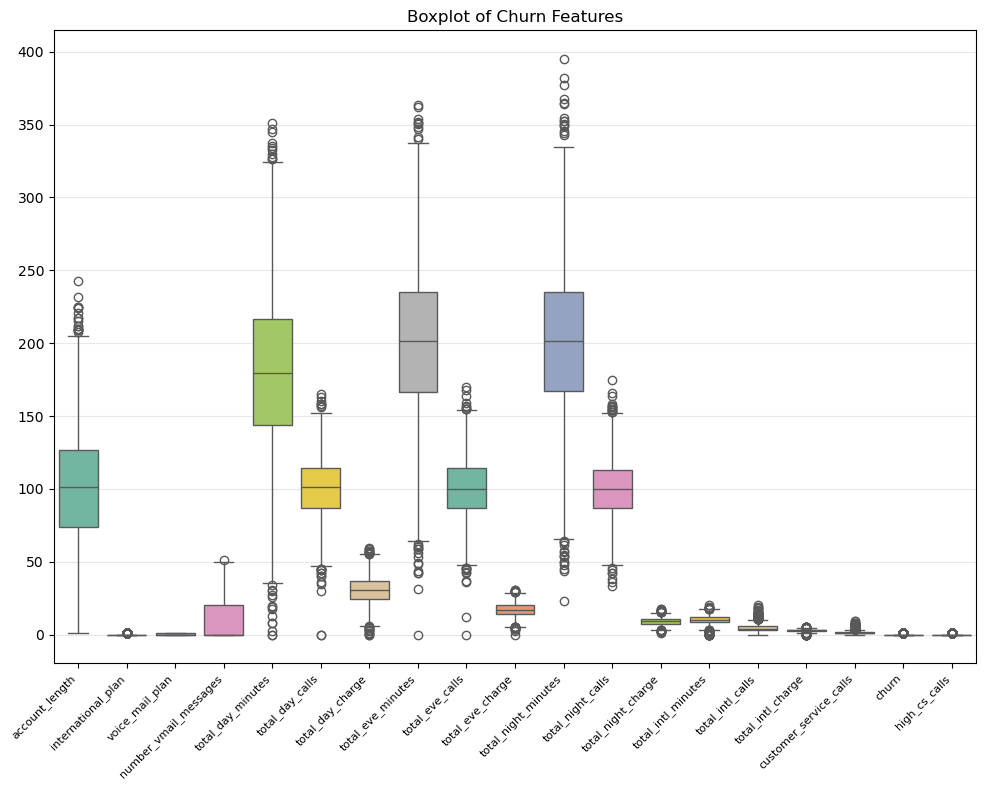

In [188]:
# Check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(df, palette="Set2")
plt.title("Boxplot of Churn Features")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(axis="y", alpha=.3)
plt.tight_layout()
plt.show()

Observation
- The outliers in this dataset are genuine, so we will not remove them.

For example,
- Values in `account_length` are valid and indicate that some customers are highly loyal.
- High and low usage is expected, since some customers barely use the services while others are heavy users.

In [118]:
# Saving the clean dataset
df.to_csv("cleaned_df.csv")

# Rechecking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   international_plan      3333 non-null   int64  
 2   voice_mail_plan         3333 non-null   int64  
 3   number_vmail_messages   3333 non-null   int64  
 4   total_day_minutes       3333 non-null   float64
 5   total_day_calls         3333 non-null   int64  
 6   total_day_charge        3333 non-null   float64
 7   total_eve_minutes       3333 non-null   float64
 8   total_eve_calls         3333 non-null   int64  
 9   total_eve_charge        3333 non-null   float64
 10  total_night_minutes     3333 non-null   float64
 11  total_night_calls       3333 non-null   int64  
 12  total_night_charge      3333 non-null   float64
 13  total_intl_minutes      3333 non-null   float64
 14  total_intl_calls        3333 non-null   

### Exploratory Data Analysis
#### Univariate Analysis
- Univariate Analysis aims to explore each feature individually, to understand its patterns, distribution and potential impact on customer churn, using appropriate visualizations. 
- We will analyze the following features in our telecom dataset to understand their characteristics and influence on churn:
1. **Churn rate distribution** - To examine the proportion of customers who churned versus those who stayed.
2. **Account Length** -The number of months a customer has been with the company, to see if longer-tenure customers are less likely to churn.
3. **Usage and charges during day, evening and night** - To analyze their patterns and distribution.


1. **Target variable: Churn**

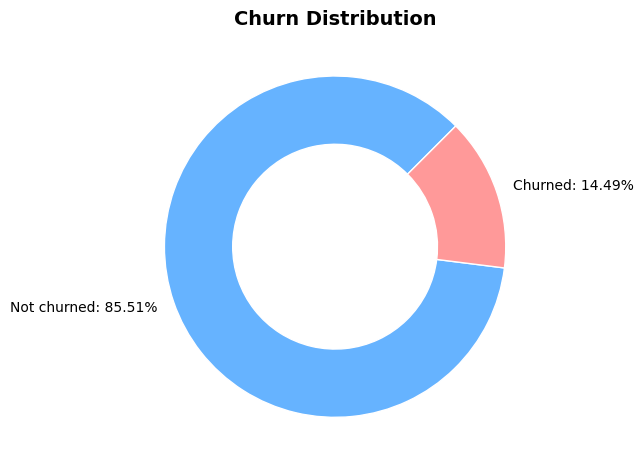

In [187]:
churn_dist = df["churn"].value_counts(normalize=True)*100
not_churned = churn_dist[0].round(2)
churned = churn_dist[1].round(2)
label = [f"Not churned: {not_churned}%", f"Churned: {churned}%"]

plt.pie([not_churned, churned], labels=label, wedgeprops=dict(width=.4, edgecolor="white"), colors=["#66B3FF", "#FF9999"], startangle=45 )
plt.title("Churn Distribution", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Most of the customers stay with the company, while a smaller portion leave.
- This indicates an imbalanced target and this will be considered when building predictive models.

2. **Account Length**

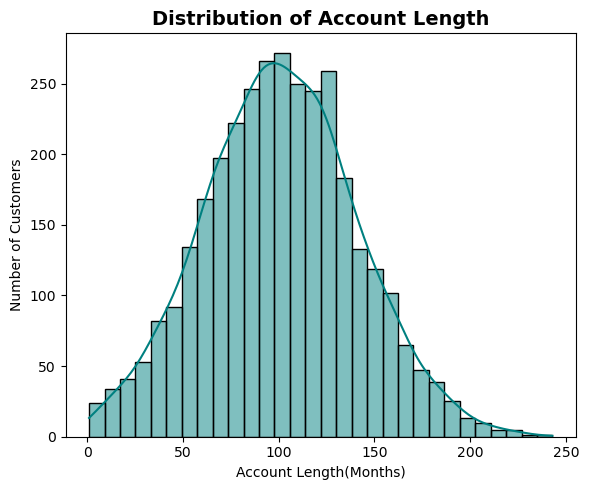

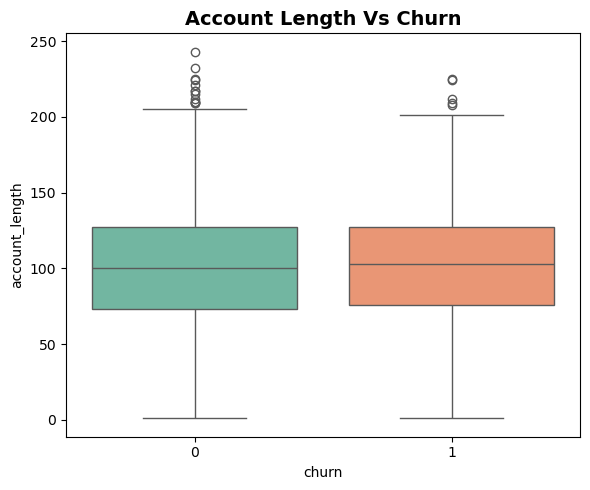

In [184]:
plt.figure(figsize=(6,5))
sns.histplot(df["account_length"], bins=30, kde=True, color="Teal")
plt.title("Distribution of Account Length", fontsize=14, weight="bold")
plt.xlabel("Account Length(Months)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x="churn", y="account_length", data=df, palette="Set2")
plt.title("Account Length Vs Churn", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

Observation 
- Account length is fairly distributed.
- Customers who churn tend to have slightly shorter tenure, suggesting longer-tenured customers are more loyal

3. **Usage and Charges(Day, Evening and Night**)

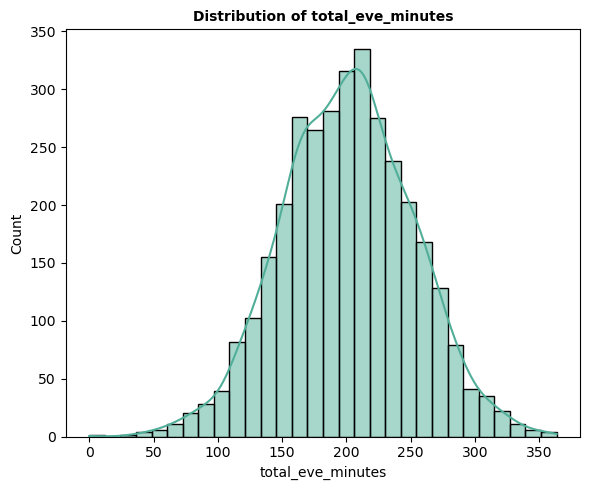

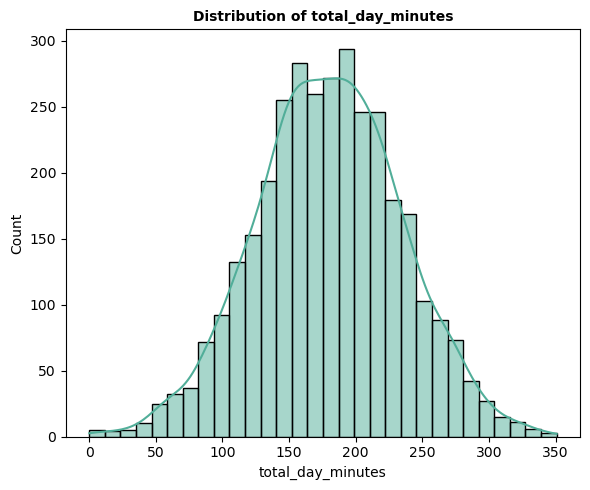

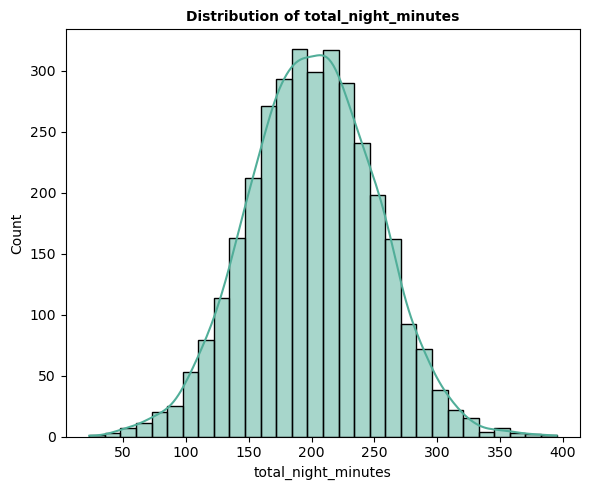

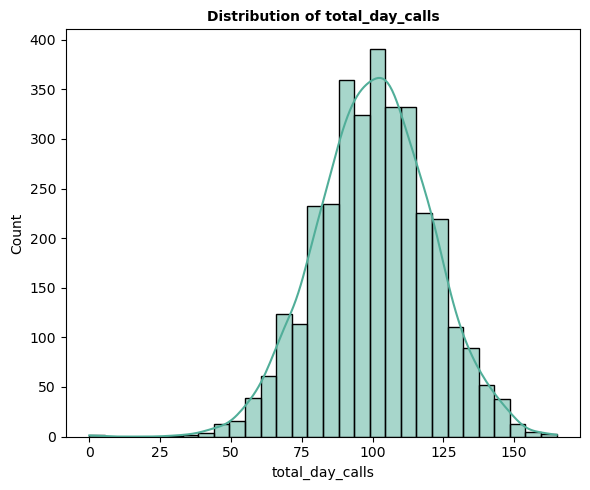

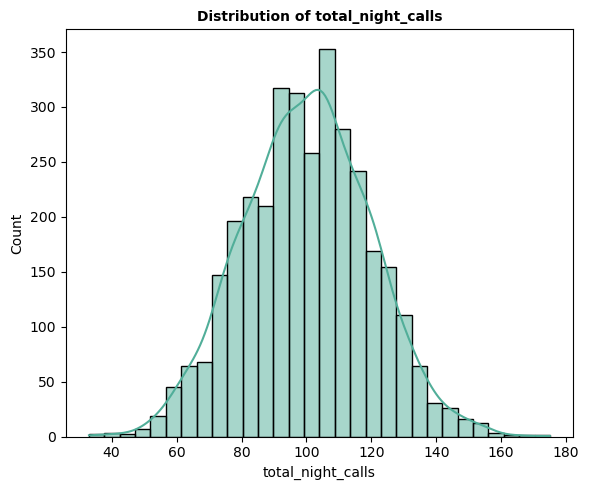

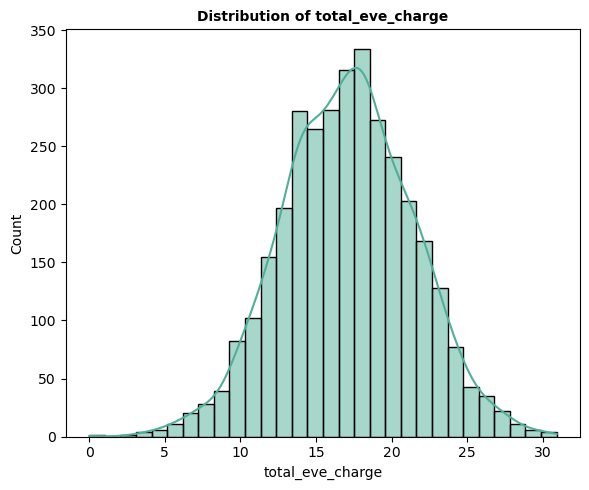

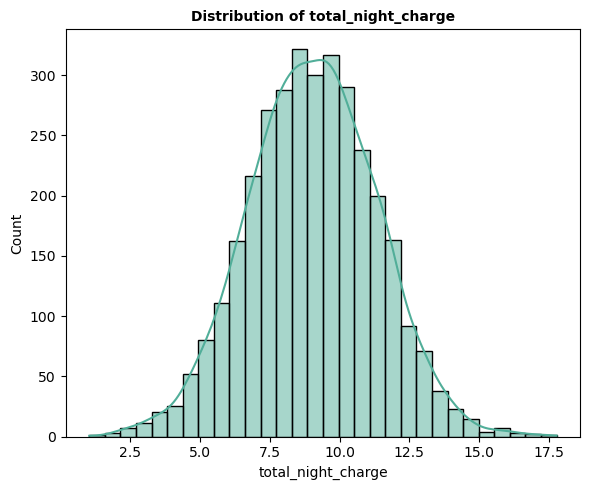

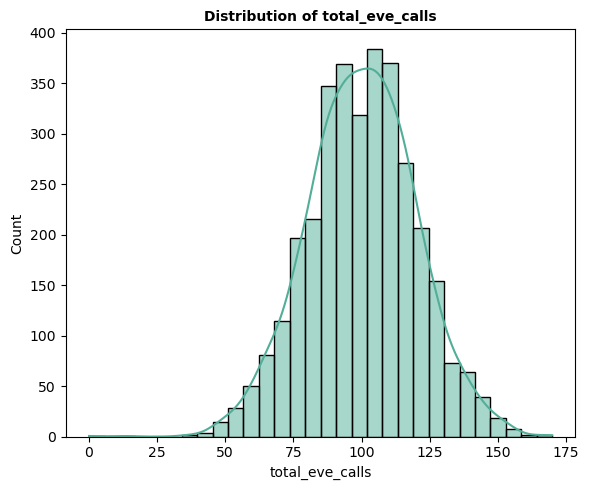

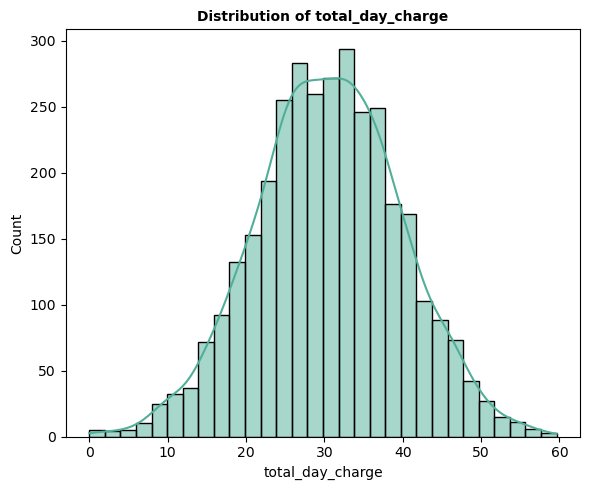

In [182]:
uc_features = {"total_day_minutes", "total_day_calls", "total_day_charge",
              "total_eve_minutes", "total_eve_calls", "total_eve_charge",
              "total_night_minutes", "total_night_calls", "total_night_charge"}

for i in uc_features:
    plt.figure(figsize=(6,5))
    sns.histplot(df[i], bins=30, kde=True, color="#51ae99")
    plt.title(f"Distribution of {i}", fontsize=10, weight="bold")
    plt.tight_layout()
    plt.show()

Observation
- Customer charges closely follow their usage patterns across all time periods. Higher call directly corresponds to higher costs.
- This trend is consistent for day, evening and night usage, indicating tht usage behavior is a strong driver of overall charges.

#### Bivariate Analysis
Bivariate analysis aims to explore the relationship between two features to identify patterns, trends and factors that are more strongly correlated with churn.

We will focus on the following key bivariate relationship in our telecom dataset:
1. **Churn versus international and Voicemail plans**.
2. **Churn versus usage and charges** - We will determine whether usage and charges during day, evening and night are linked to churn.
3. **Customer Service Calls versus Churn** 
4. **Correlation of Numeric Features with Churn** and which may serve as predictors

1. Churn Versus International and Voice plans

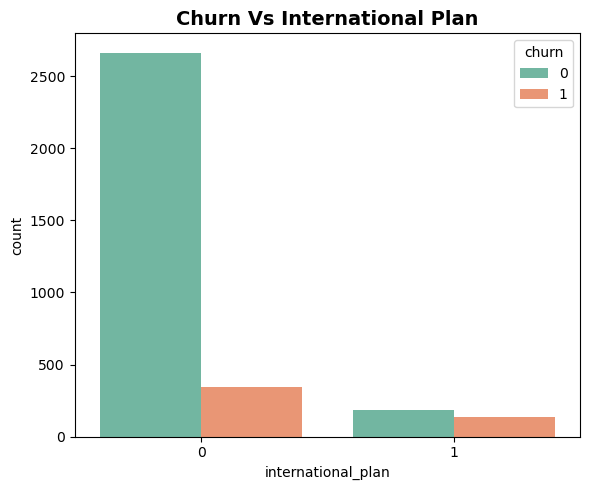

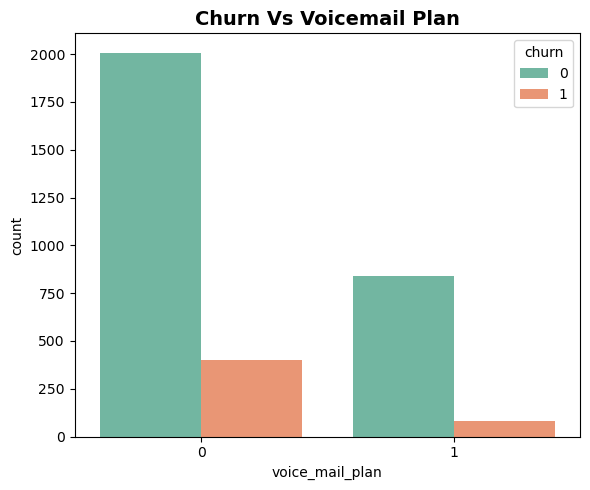

In [181]:
plt.figure(figsize=(6,5))
sns.countplot(x="international_plan", hue="churn", data=df, palette="Set2")
plt.title("Churn Vs International Plan", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.countplot(x="voice_mail_plan", hue="churn", data=df, palette="Set2")
plt.title("Churn Vs Voicemail Plan", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Customers with international plan have a significantly higher likelihood of churning compared to those without. This may suggest that international plan users may be sensitive to costs or experience dissatisfaction leading to churn.
- Having a voicemail plan shows a little effect on churn.

2. **Churn verses Usage and Charges**

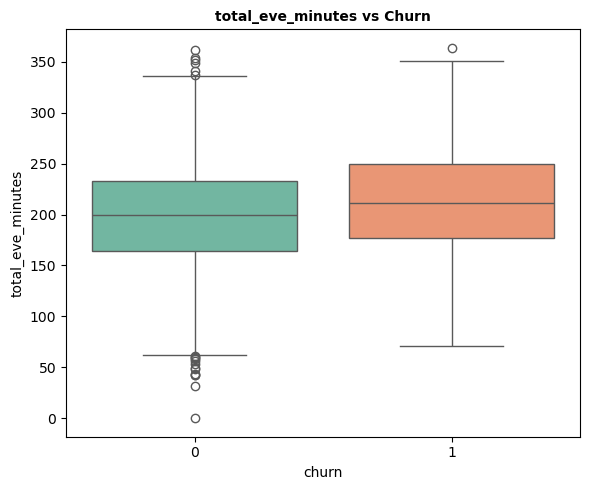

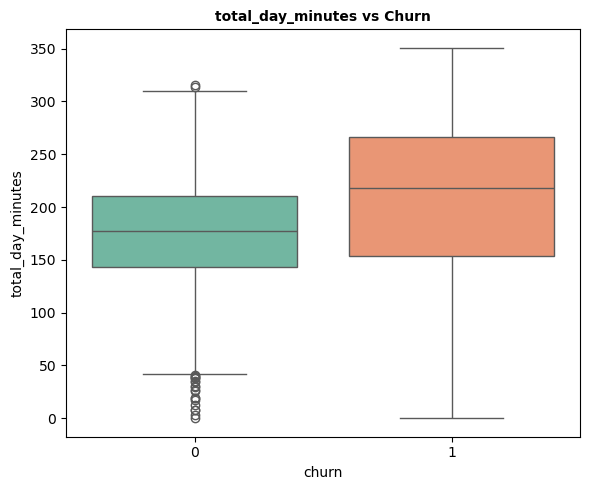

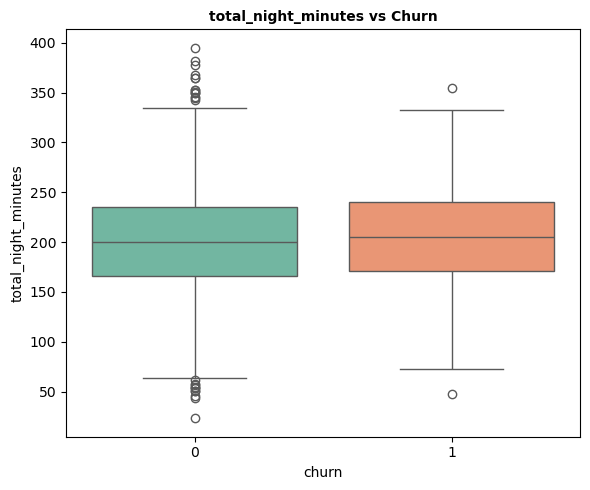

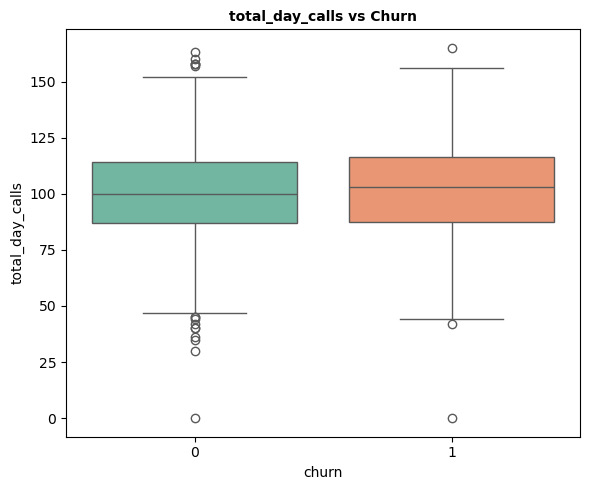

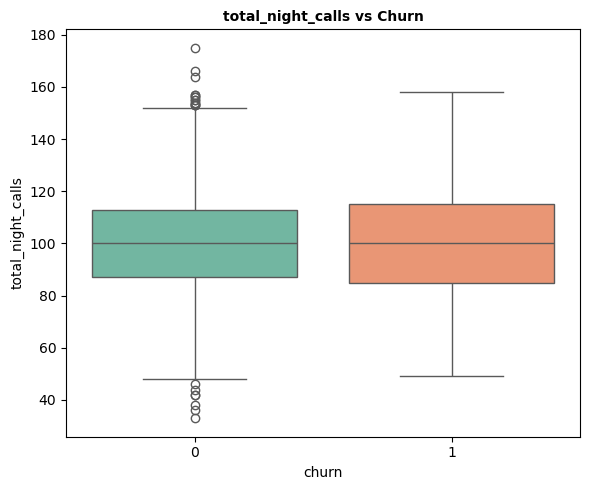

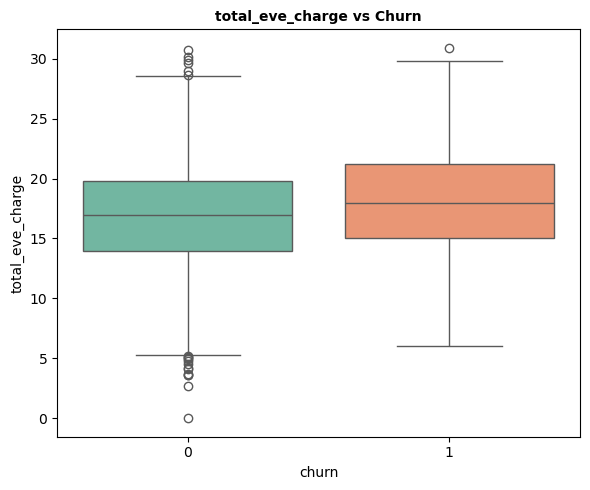

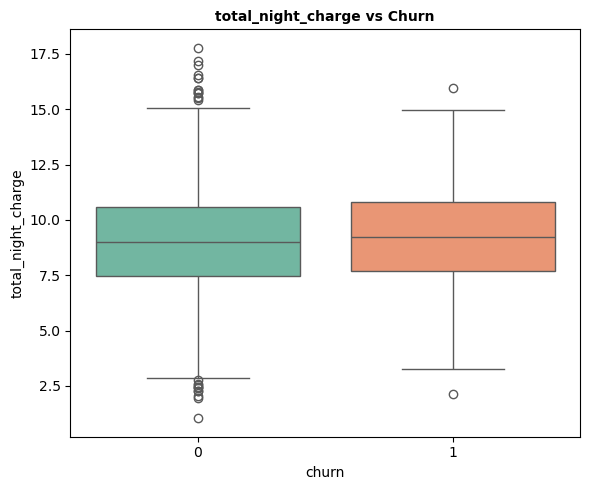

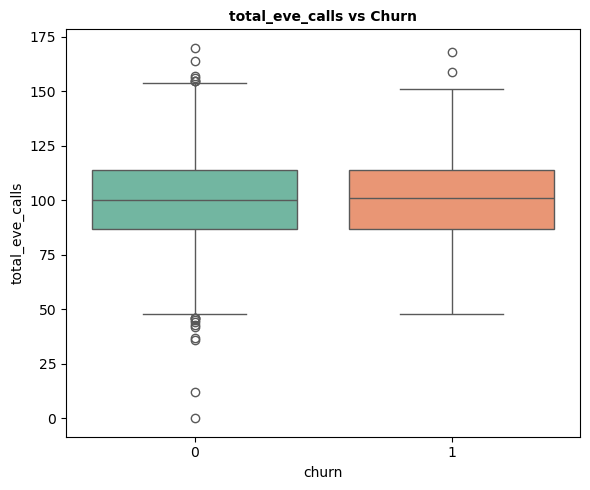

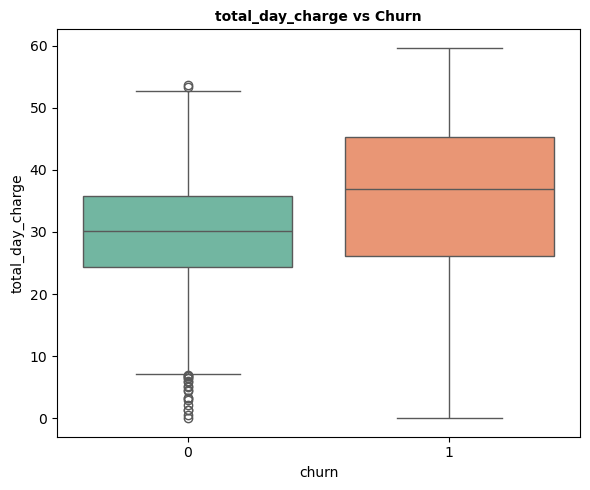

In [179]:
uc_features = {"total_day_minutes", "total_day_calls", "total_day_charge",
              "total_eve_minutes", "total_eve_calls", "total_eve_charge",
              "total_night_minutes", "total_night_calls", "total_night_charge"}

for i in uc_features:
    plt.figure(figsize=(6,5))
    sns.boxplot(x="churn", y=i, data=df, palette="Set2")
    plt.title(f"{i} vs Churn", fontsize=10, weight="bold")
    plt.tight_layout()
    plt.show()

Observation
- Customers who churn tend to have higher day and evening usage but slightly lower night usage, which corresponds to higher charges during the day and evening periods.
- Across all time periods there are both extremely high and extremely low usage valuues, indicating a wide range of customer behavior.
- High usage outliers often align with churners who face higher costs while low usage outliers may represent minimal or dormant accounts.
- These patterns suggest that usage intensity is an important predictor of churn, and scaling is necessary to ensure the model accounts fairly for extreme values.


3. **Customer Service Calls versus Churn**

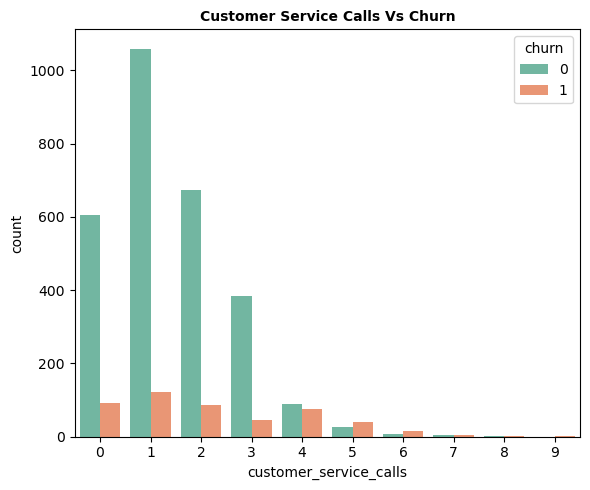

In [178]:
plt.figure(figsize=(6,5))
sns.countplot(x="customer_service_calls", hue="churn", data=df, palette="Set2")
plt.title("Customer Service Calls Vs Churn", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Customers who make more customer service calls are more likely to churn, indicating that frequent service issues contribute to dissatisfaction.

4. **Correlation of features with Churn**

In [125]:
df.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

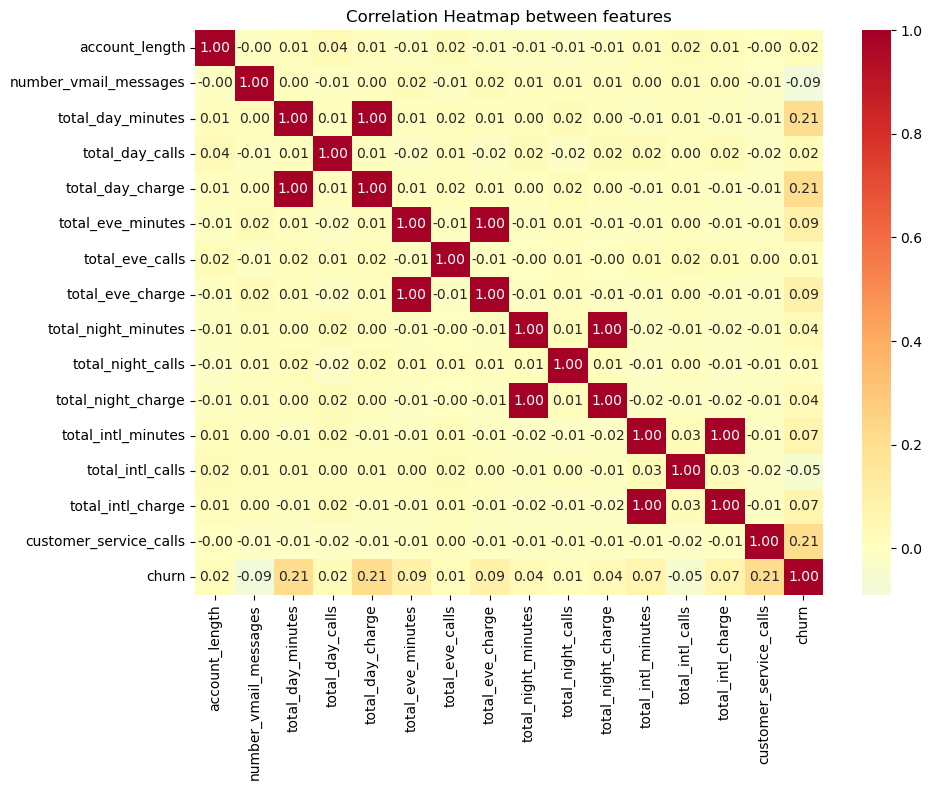

In [177]:
features = ["account_length", "number_vmail_messages", "total_day_minutes", "total_day_calls",
       "total_day_charge", "total_eve_minutes", "total_eve_calls",
       "total_eve_charge", "total_night_minutes", "total_night_calls",
       "total_night_charge", "total_intl_minutes", "total_intl_calls",
       "total_intl_charge", "customer_service_calls", "churn"]

corr = df[features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlBu_r", center=0)
plt.title("Correlation Heatmap between features")
plt.tight_layout()
plt.show()


Observation
- Features like `customer_service_calls`, `total_day_minutes`, `total_day_charge`, show a positive correlation with churn, indicating higher usage or more service calls may increase the likelihood of churn.
- There is a strong correlation between usage and charge features `total_day_charge` and `total_day_minutes`, ``total_eve_charge` and `total_eve_minutes`,`total_night_charge` and `total_night_minutes`, 
`total_intl_charge` and `total_intl_minutes`, but these features show only weak correlation with churn individually, likely due to multicollinearity and interaction with other factors.
- The target variable `churn` is imbalanced, so correlation with numeric features are naturally smaller.
- Outliers in usage and charge features can also reduce correlation values.
- Lower correlation does imply that feature is unimportant for predicting churn. Non linear relationship exists in this dataset.Feature importance analysis during modeling will help capture these effects.

#### Multivariate Analysis
The goal in multivariate analysis is to explore interactions between multiple features and their influence on churn.

1. **Customer Service Calls vs International Plan vs Churn**

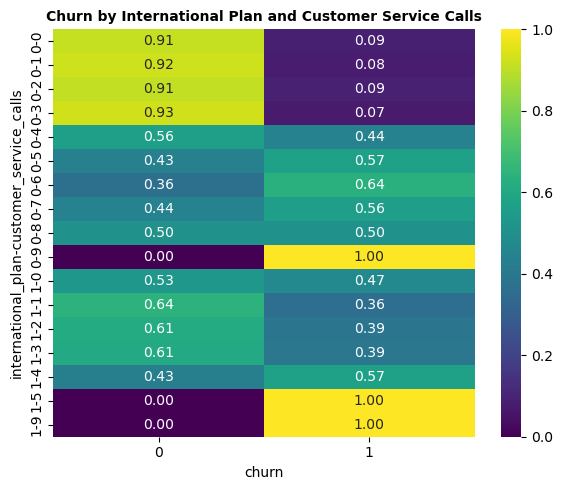

In [174]:
pivot = pd.crosstab([df["international_plan"], df["customer_service_calls"]], df["churn"], normalize="index")

plt.figure(figsize=(6,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Churn by International Plan and Customer Service Calls", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Segments with international plan + multiple service calls show higher churn probabilities.

2. **Usage versus Plan Type versus Churn**

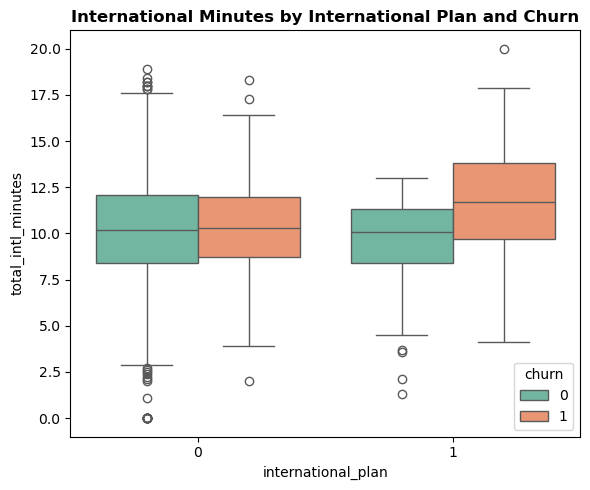

In [175]:
plt.figure(figsize=(6,5))
sns.boxplot(x="international_plan", y="total_intl_minutes", hue="churn", data=df, palette="Set2")
plt.title("International Minutes by International Plan and Churn", fontsize=12, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Customer with an international plan tend to have higher international minutes and many of these customers are churners.
- Outliers exists on both ends , some customers have very low usage others have extremely high usage.


3. **Using pairplot to visualize multiple features with churn to spot clusters**

<Figure size 600x400 with 0 Axes>

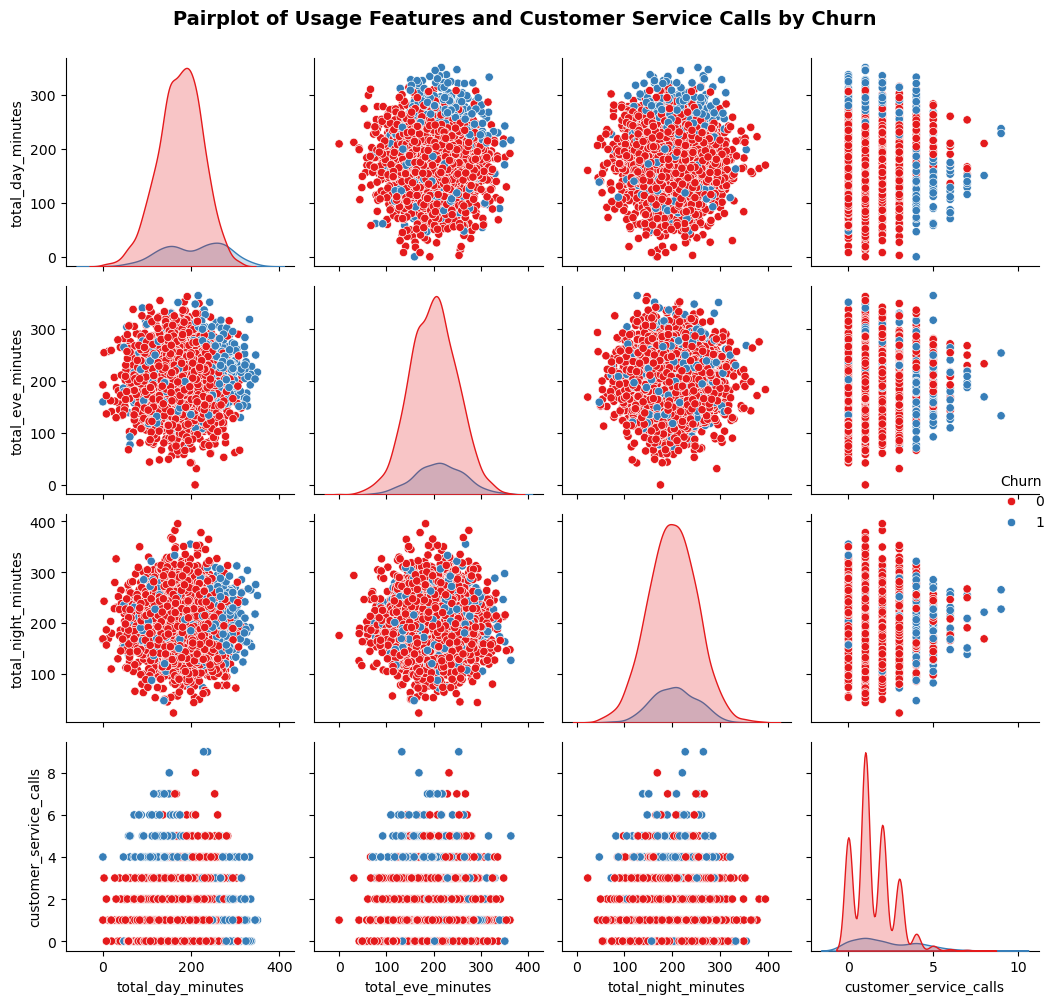

In [173]:
plt.figure(figsize=(6,4))
pairplot = sns.pairplot(df, vars=["total_day_minutes", "total_eve_minutes", 
                                  "total_night_minutes", "customer_service_calls"], 
                                   hue="churn", palette="Set1", diag_kind="kde")
pairplot._legend.set_title("Churn")
plt.subplots_adjust(top=1)
pairplot.fig.suptitle("Pairplot of Usage Features and Customer Service Calls by Churn",
                       fontsize=14, weight="bold", y=1)
plt.tight_layout()
plt.show()

Observation

**Note**: `Churned customers` are those in `blue` dots and `non-churned customers` in `red` dots.
- Churned Customers are clustered in high usage + high service call regions, while non-churned customers are more spread out in lower usage and fewer service calls areas.

**Recommendations Following EDA**

Based on the insights gained from Exoloratory Data Analysis, the following steps are recommended to prepare the data for modeling and improve churn prediction performance:

1. **Address Multicollinearity** to reduce redundancy by combining highly correlated features like usage and charge features, or use Tree based models(e.g, Random Forest, XGBoost) that handles it naturally.
2. **Retain genuine outliers**. Outliers observed in usage and service call features reflect real customer behavior and carry important signals for churn prediction.
3. **Feature engineering** to generate interaction features to capture non-linear effects and enhance predictive power.Binning extreme values into categories to capture churn behavior better.
4. **Cross Validation**. Implement stratified K-fold Cross Validation to ensure robust model evaluation and deal with class imbalances.


### Feature Engineering

To address the issues identified during EDA, the following feature engineering strategies will be applied: 

1. **Multicollinearity**
- Usage minutes and charges are linearly related(charge = minutes * rate)
-Keeping both introduces redundancy and perfect correlation, which negatively impacts modeling.
- We will drop charges and retain minutes since they provide same information but in a more interpretable form.

2. **Interaction features**
- Many relationships with churn were non-linear.
- To capture this effects, we will create interaction features to highlight how plan ownership interacts with actual usage and service calls in driving churn. 

3. **Binning features with Outliers**
- Outliers were found to be genuine so we will keep them raw as is.
- To capture risk thresholds, we will introduce binary flags based on usage above 75th percentile and customer service calls with customers making more than 3 calls.
- This will allow models to distinguish high-risk groups while keeping the raw continuous variables.


In [130]:
# Dropping charge features to minimize redundancy
df1 = df.drop(columns=["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"], axis=1)
df1[:2]

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0


In [131]:
# Introducing interaction features
# International plan and day minutes
df1["intl_plan_day_minutes"] = df1["international_plan"] * df1["total_intl_minutes"]

# Customer service calls and international plan
df1["cs_calls_intl_plan"] = df1["customer_service_calls"] * df1["international_plan"]

# Customer service calls and day minutes
df1["cs_calls_day_minutes"] = df1["customer_service_calls"] * df1["total_day_minutes"]

# Voicemail interaction
df1["vmail_activity"] = df1["voice_mail_plan"] * df1["number_vmail_messages"]

# Aggregating usage
df1["total_usage"] = (df1["total_day_minutes"] + df1["total_eve_minutes"] +
                      df1["total_night_minutes"] + df1["total_intl_minutes"])
# Recheck columns
df1.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'customer_service_calls', 'churn', 'intl_plan_day_minutes',
       'cs_calls_intl_plan', 'cs_calls_day_minutes', 'vmail_activity',
       'total_usage'],
      dtype='object')

In [132]:
# Handling outliers 
# Customer service calls
df["high_cs_calls"] = np.where(df1["customer_service_calls"] > 3 , 1, 0)

# Usage
df1["high_day_usage"] = np.where(df1["total_day_minutes"] > df1["total_day_minutes"].quantile(0.75), 1, 0)
df1["high_eve_usage"] = np.where(df1["total_eve_minutes"] > df1["total_eve_minutes"].quantile(0.75), 1, 0)
df1["high_night_usage"] = np.where(df1["total_night_minutes"] > df1["total_night_minutes"].quantile(0.75), 1, 0)
df1["high_intl_usage"] = np.where(df1["total_intl_minutes"] > df1["total_intl_minutes"].quantile(0.75), 1, 0)

# Account length outliers and encoding
df1["account_length_bin"] = pd.qcut(df1["account_length"], q=4, labels=["short", "medium", "long", "very_long"])
df1 = pd.get_dummies(df1, columns=["account_length_bin"], drop_first=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_length                3333 non-null   int64  
 1   international_plan            3333 non-null   int64  
 2   voice_mail_plan               3333 non-null   int64  
 3   number_vmail_messages         3333 non-null   int64  
 4   total_day_minutes             3333 non-null   float64
 5   total_day_calls               3333 non-null   int64  
 6   total_eve_minutes             3333 non-null   float64
 7   total_eve_calls               3333 non-null   int64  
 8   total_night_minutes           3333 non-null   float64
 9   total_night_calls             3333 non-null   int64  
 10  total_intl_minutes            3333 non-null   float64
 11  total_intl_calls              3333 non-null   int64  
 12  customer_service_calls        3333 non-null   int64  
 13  chu

## Data Preprocessing
To ensure fair evaluation and optimal model performance the following preprocessing steps will be applied:

1. **Train_test split.** 
- The dataset will be divided into training(80%) and testing(20%) subsets with `random_state=42` for reproducibility.
- Stratified sampling will be applied to preserve the proportion of churn versus non-churn in both sets.
2. **Churn class imbalance**.
- The target variable `churn` is imbalanced, with the majority being non-churn. 
- This imbalance can bias models towards predicting the majority class.
- To address this, SMOTENC(Synthetic Minority Oversampling Technique for Nominal and Continuous) resampling technique will be applied.
    - SMOTENC generates synthetic samples for both continuous and categorical/binary features, ensuring a balanced training set while preserving realistic data distribution, which aligns with the nature of our dataset
3. **Feature Scaling**
- StandardScaler will be applied to continuous features to standardize magnitudes. This step is important for models sensitive to feature scale, e.g Logistic Regression, ensuring features contribute proportionally tp the learning process.

In [133]:
# Separating label from features
X = df1.drop("churn", axis=1)
y = df1["churn"]

In [134]:
# Separating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 25), (667, 25), (2666,), (667,))

In [135]:
# Handling class imbalance on the training set

# Creating a list of binary-categorical features
cat_fe = ["international_plan", "voice_mail_plan", "high_day_usage",
          "high_eve_usage", "high_night_usage", "high_intl_usage", 
          "account_length_bin_medium", "account_length_bin_long",
         "account_length_bin_very_long"]
# Converting column names to indices for SMOTENC
cat_ind = [X_train.columns.get_loc(col) for col in cat_fe]

# Instantiate SMOTEC
smotenc = SMOTENC(categorical_features = cat_ind, random_state=42)

# Fit on training set
X_train_res, y_train_res = smotenc.fit_resample(X_train, y_train)

# Checking the new class distribution of churn
print("Original training set:", Counter(y_train))
print("After SMOTENC resampling:", Counter(y_train_res))

Original training set: Counter({0: 2280, 1: 386})
After SMOTENC resampling: Counter({0: 2280, 1: 2280})


In [136]:
# Scale numeric features
cont_fe = ["account_length", "total_day_minutes", "total_day_calls",
           "total_eve_minutes", "total_eve_calls", "total_night_minutes",
           "total_night_calls", "total_intl_minutes", "total_intl_calls", "total_usage"]

scaler = StandardScaler()
# Fit on resample training set and transfom train and test
X_train_res[cont_fe] = scaler.fit_transform(X_train_res[cont_fe])
X_test[cont_fe]= scaler.transform(X_test[cont_fe])

## Modeling 
We are now ready to train predictive models to classify customer churn.
1. **Models to be used**
    - Logistic Regression which serves as a baseline to assess performance against more complex algorithms.
    - Decision Tree which captures non-linear relationships and provides interpretable decison rules.
    - Random Forest which is n ensemble tree-based model that reduces variance and improves generalization.
    - XGBoost which is a gradient boosting algorithm  optimized for predictive performance and handling imbalanced datasets.
2. **Evaluation approach** 
- Stratified K-fold Cross Validation(cv=5) will be applied to ensures each fold maintains the original churn class distribution. 
- This provides a robust and reliable estimates of model performance while mitigating potential biases from class imbalance.
3. **Metrics of Evaluation**
- Accuracy score that shows the overall correcrness of predic tions.
- Recall to show the ability of the model to correctly identify actual churners.
- Precision which shows the proportion of ptredicted churners that are true churners.
- F1-score which gives the harmonic mean of precision and recall, balancing both metrics.
- ROC-AUC measures the model's ability to distinguish between churners and non-churners across thresholds.
4. **Further Analysis**
- Hyperparameter tuning will be applied on the best models found to optimize predictive performance and minimize misclassification.
- Feature importance analysis will be performed for tree-based models to identify the key drivers of churn.



 ### 1. Logistic Regression

In [137]:
# instanting Logistic regtresssion
lr = LogisticRegression(random_state=42, max_iter=1000)
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(lr, X_train_res, y_train_res, cv=5, scoring=scoring, return_train_score=False)

for metric in scoring:
    print(f"Training_set {metric.capitalize()}: {cv_results['test_' + metric].mean():.2f} +_ {cv_results['test_' + metric].std():.2f}")

Training_set Accuracy: 0.84 +_ 0.02
Training_set Precision: 0.83 +_ 0.00
Training_set Recall: 0.84 +_ 0.05
Training_set F1: 0.84 +_ 0.03
Training_set Roc_auc: 0.90 +_ 0.02


Observation
- Metrics indicate good learning and balanced separation between churners and non-churners.
- High ROC-AUC suggests possible overfditting, potentially due SMOTENC resampling

In [138]:
# Fitting the model and training
lr.fit(X_train_res, y_train_res)

# Predicting on test
y_pred = lr.predict(X_test)

# Test Metrics
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Test Recall:", round(recall_score(y_test, y_pred), 2))
print("Test Precision:", round(precision_score(y_test, y_pred), 2))
print("Test F1-score:", round(f1_score(y_test, y_pred), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred), 2))

Test Accuracy: 0.81
Test Recall: 0.75
Test Precision: 0.41
Test F1-score: 0.53
Test ROC-AUC: 0.78


Observation

From the metrics from the test set,
- Test accuracy of 0.80 indicates a reasonable overall correctners
- Recall-0.75 indicates that the model correctly identified 75% of actual churners which proves a strong retention strategies.
- There are many false alarms with precision 0f 0.41, meaning less than half of predicted churnes are actually churners.
- F1-score- 0.53 reflects the tradeoff between good recall and poor precision.
- ROC-AUC -0.78 Reduced significantly as compared to that of the training set showing reduced separability on unseen data.


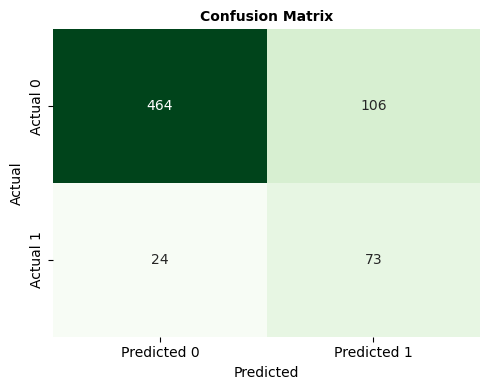

In [139]:
# Confusion matrix
conf = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix 
plt.figure(figsize=(5,4))
sns.heatmap(conf, annot=True, fmt=".0f", cmap="Greens", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Most loyal customers were correctly classified indicated by the number of **True Negatives**(463)
- 75% of churners were correctly flagged shown by the **True Positives**(73)
- A smaller group of churners was missed and indicate a risk of losing such customers as shown by **False Negatives**(24)
- A large number of loyal customers were miscalssified as churners as indicated by **False Positives**(107). If acted upon, retention offers may be wasted.

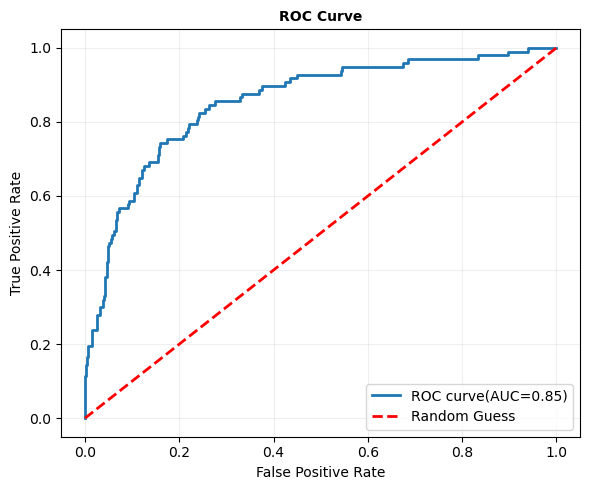

In [140]:
# Creating AUC
y_proba = lr.predict_proba(X_test)[:,1]

# getting fpr and tpr
fpr, tpr, threshold = roc_curve(y_test, y_proba)

# ROC_AUC score
roc_auc = auc(fpr, tpr)

# Visualizing ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label="ROC curve(AUC=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize= 10, weight="bold")
plt.legend(loc="lower right")
plt.grid(alpha=.2)
plt.tight_layout()
plt.show()

Observation

- From the curve above, the model captures churners but at the expense of many false alarms. The AUC shows it is better than random guessing.
- The model is less stable in ranking probabilities likely because it struggles with non-linear decision boundaries.

In [141]:
# classification report
print(f"Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.81      0.88       570
           1       0.41      0.75      0.53        97

    accuracy                           0.81       667
   macro avg       0.68      0.78      0.70       667
weighted avg       0.87      0.81      0.83       667



**Overall Observation**
- The model is strong at identifying non-churners but struggles with churners, resulting in many false positives. While recall for churners is decent(0.75), low precision(0.41)
indicates many predicted churners are actually loyal. 
- Overall weighted performance is good due to the majority class, but the model shows imbalance in handling two classes.

### 2. Decision Tree Classifier

In [142]:
# instanting Decision Tree
dt = DecisionTreeClassifier(random_state=42, class_weight=None)

# Cross Validation
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(dt, X_train_res, y_train_res, cv=5, scoring=scoring, return_train_score=False)

for metric in scoring:
    print(f"Cross Validation {metric.capitalize()}: {cv_results['test_' + metric].mean():.2f} +_ {cv_results['test_' + metric].std():.2f}")

Cross Validation Accuracy: 0.94 +_ 0.03
Cross Validation Precision: 0.93 +_ 0.01
Cross Validation Recall: 0.94 +_ 0.06
Cross Validation F1: 0.94 +_ 0.03
Cross Validation Roc_auc: 0.94 +_ 0.03


Observation

The metrics are much higher compared to those of the baseline model.
- There is an excellent fit on training folds indicated by the accuracy at approximately 94%
- The model captures almost all churners in training meaning is highly sensitive indicated by Recall of aproximately 94%
- Predictions of churn are highly reliable on training set
- There is a strong separation between churners and non churners. ROC-AUC is at around 0.94.

In [143]:
# Fitting the model and training
dt.fit(X_train_res, y_train_res)

# Predicting on test
y_pred1 = dt.predict(X_test)

# Test Metrics
print("Test Accuracy:", round(accuracy_score(y_test, y_pred1), 2))
print("Test Recall:", round(recall_score(y_test, y_pred1), 2))
print("Test Precision:", round(precision_score(y_test, y_pred1), 2))
print("Test F1-score:", round(f1_score(y_test, y_pred1), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred1), 2))

Test Accuracy: 0.89
Test Recall: 0.77
Test Precision: 0.6
Test F1-score: 0.68
Test ROC-AUC: 0.84


Observation

- Accuracy on test results of unseen data is at 89% better than that of baseline model.
- Recall 0f 77% means fewer churners are missed.
- Precision is moderate with only 60% of predicted churners being the real churners.
- The is a balanced tradeof between precision and recall at 0.68 better than the baseline model.
- ROC-AUC at 0.84 shows a strong ability of the model to separate churners from non-churners.

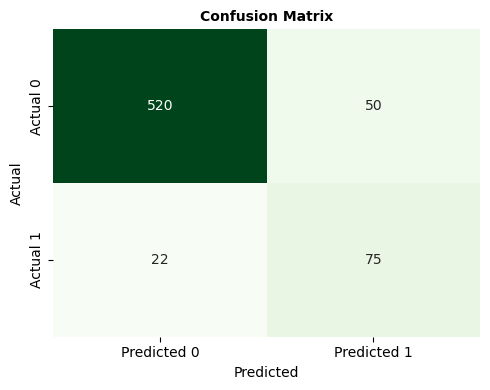

In [144]:
# Confusion matrix
conf1 = confusion_matrix(y_test, y_pred1)

# Visualizing confusion matrix 
plt.figure(figsize=(5,4))
sns.heatmap(conf1, annot=True, fmt=".0f", cmap="Greens", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

Observation
- False Negatives-22 are lower than Logistic Regression-27 meaning Decision Tree is doing better at catching churners.
- False Positives- 50 are fewer than Logistic Regression-109 meaning fewer unnecessary churn alerts.

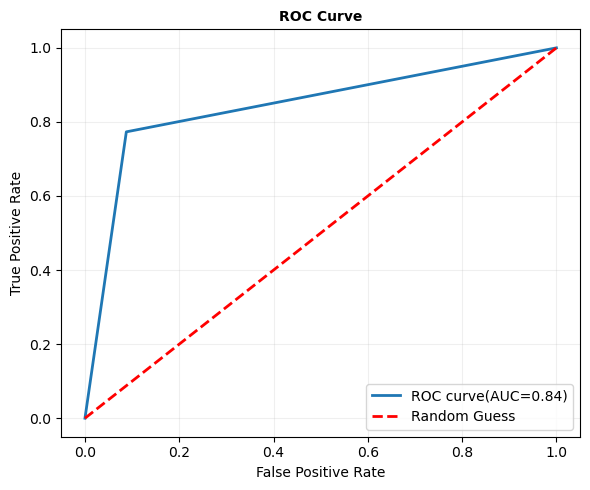

In [145]:
# Creating AUC
y_proba1 = dt.predict_proba(X_test)[:,1]

# getting fpr and tpr
fpr, tpr, threshold = roc_curve(y_test, y_proba1)

# ROC_AUC score
roc_auc = auc(fpr, tpr)

# Visualizing ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label="ROC curve(AUC=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize= 10, weight="bold")
plt.legend(loc="lower right")
plt.grid(alpha=.2)
plt.tight_layout()
plt.show()

Observation
 - The model classifies the churners very confidently at first, suggesting the tree was making hard splits then a sharp gradual increase which could suggest some overfitting.

In [146]:
# classification report
print(f"Classification Report:", classification_report(y_test, y_pred1))

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.91      0.94       570
           1       0.60      0.77      0.68        97

    accuracy                           0.89       667
   macro avg       0.78      0.84      0.81       667
weighted avg       0.91      0.89      0.90       667



**Overall Observation** 
- The Decision Tree model effectively identifies non-churners with high precision(0.96) and recall(0.91). It detects most churners(recall 0.77) but has moderate precision(0.60), indicating some false positives.
- Overall performance is good with a slight imbalance favoring the majority class. 

### 3. Random Forest Classifier

In [147]:
# instanting Decision Tree
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Cross Validation
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(rf, X_train_res, y_train_res, cv=5, scoring=scoring, return_train_score=False)

for metric in scoring:
    print(f"Cross Validation {metric.capitalize()}: {cv_results['test_' + metric].mean():.2f} +_ {cv_results['test_' + metric].std():.2f}")

Cross Validation Accuracy: 0.96 +_ 0.02
Cross Validation Precision: 0.97 +_ 0.01
Cross Validation Recall: 0.95 +_ 0.05
Cross Validation F1: 0.96 +_ 0.02
Cross Validation Roc_auc: 0.99 +_ 0.01


Observation
- Random Forest performed extremely well on the training folds, showing a high predictiove power. 
- Both recall and precision are strong, suggesting that the model balances false positives and false negatives effectively.
- Near perfect ROC-AUC indicates that the model was able to separate churners from non-churnes exceptionally on the training set.
- Slight variation in recall +-0.05 suggests some sensitivity to class splits but overall stability is good.

In [148]:
# Fitting the model and training
rf.fit(X_train_res, y_train_res)

# Predicting on test
y_pred2 = rf.predict(X_test)

# Test Metrics
print("Test Accuracy:", round(accuracy_score(y_test, y_pred2), 2))
print("Test Recall:", round(recall_score(y_test, y_pred2), 2))
print("Test Precision:", round(precision_score(y_test, y_pred2), 2))
print("Test F1-score:", round(f1_score(y_test, y_pred2), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred2), 2))

Test Accuracy: 0.93
Test Recall: 0.75
Test Precision: 0.76
Test F1-score: 0.76
Test ROC-AUC: 0.86


Observation
- Accuracy is strong at 93% but recall dropped to 75% on test set on unseen data, meaning 25% of churners are still being missed. 
- Precision at 76% shows the model predicts churn  three quarters of the time.
- F1- score at 76% confirms a decent tradeoff between recall and precision.
- ROC-AUC at 0.86 reflects very good discriminative ability, even on unseen data, though not as perfect as in training.

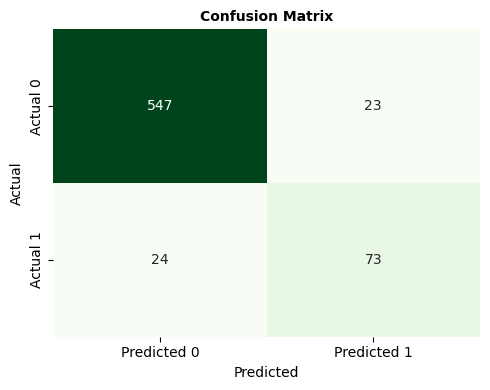

In [149]:
# Confusion matrix
conf2 = confusion_matrix(y_test, y_pred2)

# Visualizing confusion matrix 
plt.figure(figsize=(5,4))
sns.heatmap(conf2, annot=True, fmt=".0f", cmap="Greens", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

Observation
- The model correctly identified 547 non-churners(TN) and 73 churners(TP)
- Only 23 non-churners were strongly wrongy flagged(FP) which is quite small.
- 24 churners however, were missed(FN). This is important to note because missing churners can be costly for the business.

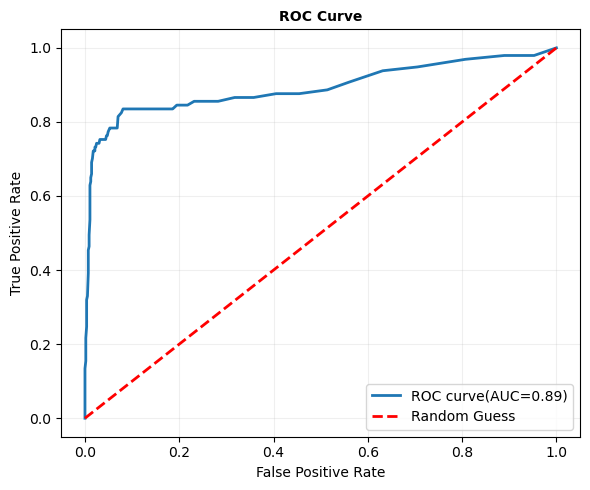

In [150]:
# Creating AUC
y_proba2 = rf.predict_proba(X_test)[:,1]

# getting fpr and tpr
fpr, tpr, threshold = roc_curve(y_test, y_proba2)

# ROC_AUC score
roc_auc = auc(fpr, tpr)

# Visualizing ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label="ROC curve(AUC=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize= 10, weight="bold")
plt.legend(loc="lower right")
plt.grid(alpha=.2)
plt.tight_layout()
plt.show()

Observation
- The model makes excellent early splits to capture churners at first then, the curve rises more gradually showing diminishing returns as thresholds loosen.
- The curve generally has a very high discriminative power.

In [151]:
# classification report
print(f"Classification Report:", classification_report(y_test, y_pred2))

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96       570
           1       0.76      0.75      0.76        97

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



**Overall Observation**
- The Random Forest model performs well for both classes. Non-churners are identified with high precision and recall(0.96 each), while churners are detected reasonably(precision 0.76, recall 0.75).
- The model shows balanced performance with strong overall accuracy(0.93) and minimal bias toward the majority class.

### 4. XGBoost Classifier

In [152]:
# instanting Decision Tree
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss",random_state=42, n_jobs=-1)

# Cross Validation
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(xgb, X_train_res, y_train_res, cv=5, scoring=scoring, return_train_score=False)

for metric in scoring:
    print(f"Cross Validation {metric.capitalize()}: {cv_results['test_' + metric].mean():.2f} +_ {cv_results['test_' + metric].std():.2f}")

Cross Validation Accuracy: 0.97 +_ 0.03
Cross Validation Precision: 0.98 +_ 0.00
Cross Validation Recall: 0.95 +_ 0.06
Cross Validation F1: 0.97 +_ 0.03
Cross Validation Roc_auc: 0.99 +_ 0.01


Observation
- XGBoost generalizes very well compared to previous models during training. 
- The metrics on average range from 0.91 to 0.99 which indicate a very high and stable model where almost all predicted churners are actual churners during training. The model has a strong ability to capture most chunners and strikes a balanced performance with no bias on either recall or precision. The ROC-AUC is at 0.99 indicating an almost perfect separability between churners and non-churners.

In [153]:
# Fitting the model and training
xgb.fit(X_train_res, y_train_res)

# Predicting on test
y_pred3 = xgb.predict(X_test)

# Test Metrics
print("Test Accuracy:", round(accuracy_score(y_test, y_pred3), 2))
print("Test Recall:", round(recall_score(y_test, y_pred3), 2))
print("Test Precision:", round(precision_score(y_test, y_pred3), 2))
print("Test F1-score:", round(f1_score(y_test, y_pred3), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred3), 2))

Test Accuracy: 0.94
Test Recall: 0.77
Test Precision: 0.82
Test F1-score: 0.8
Test ROC-AUC: 0.87


Observation
- Prediction on unseen data shows that the model is very good, with the strongest test so far. 
- It has a Recall shows a drop from 95% from the training set, its fairly good but only captures 77% of churners.
- Precision is at 82% indicating fewer false alarms
- F1-score is 80% showing a strong tradeoff between precision and recall.
- ROC-AUC is at 87% suggesting that the model has a high discriminative power. 

Although the metrics on the test set is slightly lower that that of the training set, it still provide excellent results. 



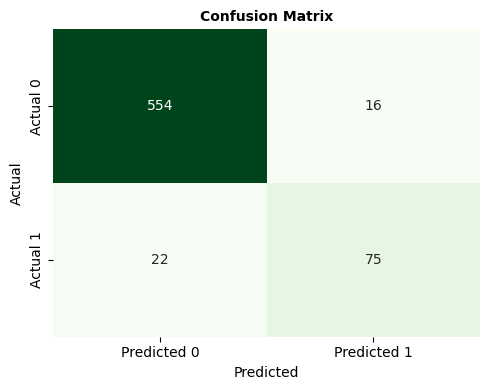

In [154]:
# Confusion matrix
conf3 = confusion_matrix(y_test, y_pred3)

# Visualizing confusion matrix 
plt.figure(figsize=(5,4))
sns.heatmap(conf3, annot=True, fmt=".0f", cmap="Greens", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

Observation
- Most non-churners are correctly predicted i.e True Negatives(554)
- The model rarely mislabels loyal customers as churners indicated by False Positives(16)
- Some churners were missed but much better compared to Logistic Regression. False Negative(22)
- A large portion of churners were correctly identified. True Positive(75)

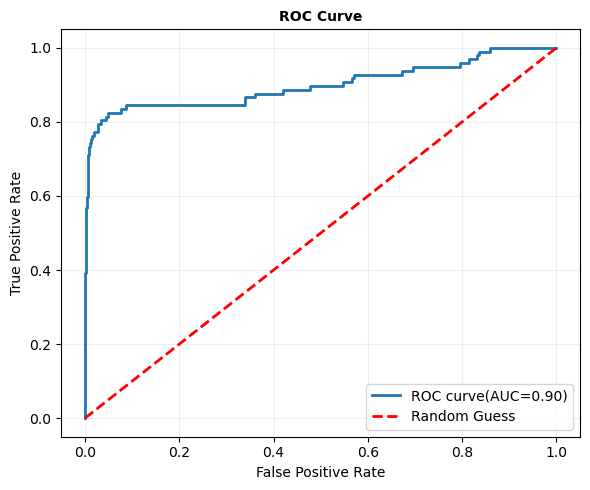

In [155]:
# Creating AUC
y_proba3 = xgb.predict_proba(X_test)[:,1]

# getting fpr and tpr
fpr, tpr, threshold = roc_curve(y_test, y_proba3)

# ROC_AUC score
roc_auc = auc(fpr, tpr)

# Visualizing ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label="ROC curve(AUC=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize= 10, weight="bold")
plt.legend(loc="lower right")
plt.grid(alpha=.2)
plt.tight_layout()
plt.show()

Observation
- The model confirms very strong discriminate ability.
- The sharp rise means the model confidently separates churners early.
- The flat portions indicate ranges of threshold where the model is not gaining much dicriminative power.

In [156]:
# classification report
print(f"Classification Report:", classification_report(y_test, y_pred3))

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97       570
           1       0.82      0.77      0.80        97

    accuracy                           0.94       667
   macro avg       0.89      0.87      0.88       667
weighted avg       0.94      0.94      0.94       667



**Overall Observation**
- The XGBoost model demonstrates strong performance across both classes. Non-churners are predicted very accurately (precision 0.96, recall 0.97) while churners are also well-identified (precision 0.82, recall 0.77), showing improved balance over Random Forest. Overall accuracy is high (0.94) and macro averages indicate good handling of both classes, making it the best-performing model for churn prediction.

### Key Highlights
1. **Logistic Regression** captures churners reasonably well with a recall of 75%, but precision is very weak at 41%. The model generates many False Positives, meaning numerous loyal customers are flagged as churners. Using this model risks wasting retention resources.
2. **Decision Tree Classifier** show decent performance but exhibits signs of overfitting. Pruning could improve generalization. Overall, it is more balanced than Logistic Regression but less robust than ensemble methods.
3. **Random Forest Classifier** demonstrates strong performance on both train and test data. It achieves a balanced precision - recall tradeoff, capturing churners while minimizing false positives. The model is robust, stable and its ROC curve shows excellent discrimination power.
4. **XGBoost Classifier** achieves the highest accuracy and F1-score across all models, with very few false positives. Its ROC-AUC indicates strong discriminative ability, slightly lower than Random Forest but more stable. XGBoost provides the best tradeoff between business cost(false positives) and customer retention(recall)

Both Random Forest and XGBoost consistently outperform Logistic Regression and Decision Tree in test metrics, generalize well, and are less prone to overfitting. They also can handle class imbalance and feature interactions effectively.

**Conclusion**: We select **Random Forest** as robust and interpretable ensemble model and **XGBoost** as the top performing candidate to push further with hyperparameter tuning.

### Hyperparameter tuning

In [157]:
# Random Forest Hyperparameter tuning
rf_param_grid = {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10, 20],
                 "min_samples_split": [2, 5, 10], "min_samples_leaf":[1,2,4],
                 "max_features": ["sqrt", "log2"], "bootstrap": [True, False]}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=rf_param_grid, n_iter=20,
                               cv=5, scoring="roc_auc", n_jobs=-1, verbose=2, random_state=42)

rf_random.fit(X_train_res, y_train_res)
print("Best Params:", rf_random.best_params_)
print(f"Best ROC-AUC: {rf_random.best_score_:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best ROC-AUC: 0.99


In [158]:
# XGBoost Hyperparameter tuning
xgb_param_grid = {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 7, 10],
                  "learning_rate": [0.01, 0.05, 0.1, 0.2], "subsample": [0.6, 0.8, 1.0],
                  "colsample_bytree": [0.6, 0.8, 1.0], "gamma": [0, 0.1, 0.2, 0.3],
                  "reg_alpha": [0, 0.01, 0.1], "reg_lambda": [1, 1.5, 2]}

xgb_random = RandomizedSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42), 
                                param_distributions=xgb_param_grid, n_iter=20, cv=5,
                                scoring="roc_auc", n_jobs=-1, verbose=2, random_state=42)
xgb_random.fit(X_train_res, y_train_res)

print("Best Params:", xgb_random.best_params_)
print(f"Best ROC-AUC: {xgb_random.best_score_:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Best ROC-AUC: 0.99


In [159]:
# Retraining  Random Forest with best parameters
rf_best = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features="sqrt",
                                 max_depth=20, bootstrap=False,random_state=42)

rf_best.fit(X_train_res, y_train_res)


,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [160]:
# Predicting on test
y_pred_rf = rf_best.predict(X_test)

# Test Metrics
print("Random Forest Tuned")
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("Test Recall:", round(recall_score(y_test, y_pred_rf), 2))
print("Test Precision:", round(precision_score(y_test, y_pred_rf), 2))
print("Test F1-score:", round(f1_score(y_test, y_pred_rf), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred_rf), 2))

Random Forest Tuned
Test Accuracy: 0.94
Test Recall: 0.78
Test Precision: 0.83
Test F1-score: 0.8
Test ROC-AUC: 0.88


[[464 106]
 [ 24  73]]


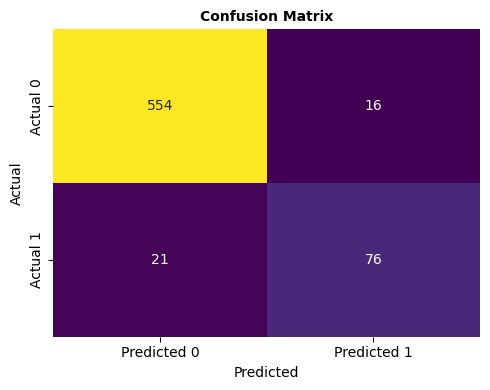

In [161]:
# Confusion matrix
conf4 = confusion_matrix(y_test, y_pred_rf)
print(conf)

# Visualizing confusion matrix 
plt.figure(figsize=(5,4))
sns.heatmap(conf4, annot=True, fmt=".0f", cmap="viridis", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

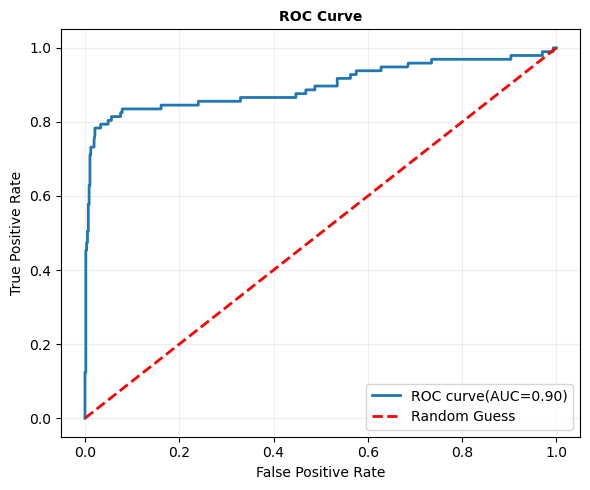

In [162]:
# Creating AUC
y_proba_rf = rf_best.predict_proba(X_test)[:,1]

# getting fpr and tpr
fpr, tpr, threshold = roc_curve(y_test, y_proba_rf)

# ROC_AUC score
roc_auc = auc(fpr, tpr)

# Visualizing ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label="ROC curve(AUC=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize= 10, weight="bold")
plt.legend(loc="lower right")
plt.grid(alpha=.2)
plt.tight_layout()
plt.show()

In [163]:
# classification report
print(f"Classification Report:", classification_report(y_test, y_pred_rf))

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97       570
           1       0.83      0.78      0.80        97

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.89       667
weighted avg       0.94      0.94      0.94       667



Observation

- The tuned Random Forest demonstrates high overall accuracy(94%) and effectively captures churners with a recall of 78%.
- Precison of churners(83%) is slightly lower than for non-churners(96%), indicating that some loyal customers are ocassionally misclassified as churners.
- This trade-off is acceptable in churn churn prediction because missing actual churners(low recall) is typically more costly than flagging loyal customers(lower precision)
- The model balances detection of churners while maintaining strong overall performance, making it a robust choice for actionable customer strategies.

In [164]:
# Retraining  XGBoost with best parameters
xgb_best = XGBClassifier(subsample=0.8, reg_lambda=1, reg_alpha=0,
                         n_estimators=200, max_depth=5, learning_rate=0.2,
                         gamma=0, colsample_bytree=0.8, use_label_encoder=False,
                         eval_metric="logloss", random_state=42)

xgb_best.fit(X_train_res, y_train_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [165]:
# Predicting on test
y_pred_xgb = xgb_best.predict(X_test)

# Test Metrics
print("XGBoost Tuned")
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 2))
print("Test Recall:", round(recall_score(y_test, y_pred_xgb), 2))
print("Test Precision:", round(precision_score(y_test, y_pred_xgb), 2))
print("Test F1-score:", round(f1_score(y_test, y_pred_xgb), 2))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_pred_xgb), 2))

XGBoost Tuned
Test Accuracy: 0.96
Test Recall: 0.82
Test Precision: 0.88
Test F1-score: 0.85
Test ROC-AUC: 0.9


[[464 106]
 [ 24  73]]


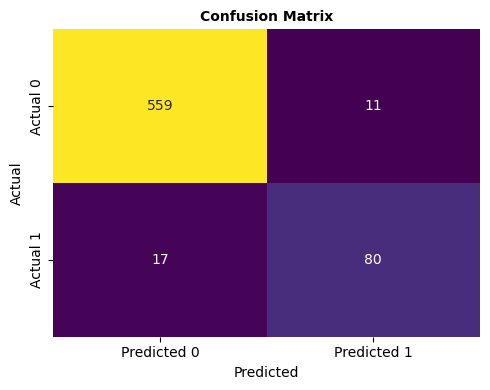

In [166]:
conf5 = confusion_matrix(y_test, y_pred_xgb)
print(conf)
# Visualizing confusion matrix 
plt.figure(figsize=(5,4))
sns.heatmap(conf5, annot=True, fmt=".0f", cmap="viridis", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix", fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

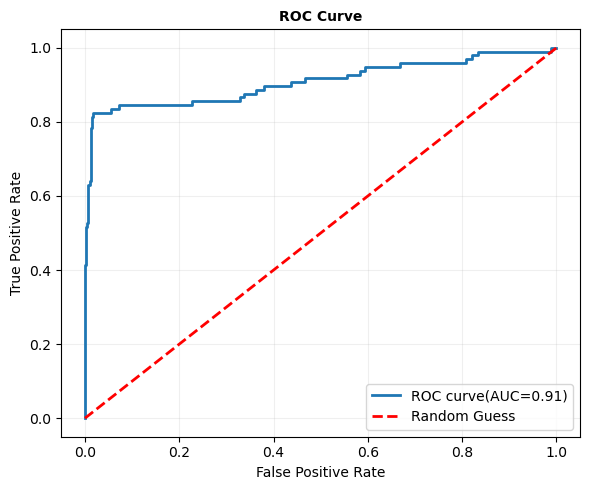

In [167]:
# Creating AUC
y_proba_xgb = xgb_best.predict_proba(X_test)[:,1]

# getting fpr and tpr
fpr, tpr, threshold = roc_curve(y_test, y_proba_xgb)

# ROC_AUC score
roc_auc = auc(fpr, tpr)

# Visualizing ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label="ROC curve(AUC=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize= 10, weight="bold")
plt.legend(loc="lower right")
plt.grid(alpha=.2)
plt.tight_layout()
plt.show()

In [168]:
# classification report
print(f"Classification Report:", classification_report(y_test, y_pred_xgb))

Classification Report:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       570
           1       0.88      0.82      0.85        97

    accuracy                           0.96       667
   macro avg       0.92      0.90      0.91       667
weighted avg       0.96      0.96      0.96       667



Observation

 - The tuned XGBoost model achieves high overall accuracy(96%), correctly predicting the majority of customers.
 - It captures 82% of actual churners(recall), minimizing missed cases.
 - Precision for churners is 88%, indicating that most predicted churners are truly likely to churn,reducing false alarms. 
 - The F1-score of 85% reflects a good balance between precision and recall.
 - ROC-AUC of 0.90 demonstrates strong discriminative power between churners and non-churners.

In comparison to tuned Random Forest model;

- XGBoost outperforms Random Forest across the board with higher precision, recall and F1-score for churners.

- Churn recalls is 82% in XGBoost as compared to 78% in Random Forest. This means, XGBoost detects more actual churners.

- Churn precision is 88% in XGBoost in comparision with 83% in Random Forest, meaning XGboost have fewer false alarms.

This makes **XGBoost** the best overall model for churn prediction. 



### Feature Importance

In [169]:
# Getting feature importance scores
xgb_best = xgb_random.best_estimator_

importances = xgb_best.feature_importances_
features = X_train.columns

# Converting to a dataframe
feat_imp = pd.DataFrame({"Feature": features, "Importances": importances}).sort_values(by="Importances", ascending=False)

# Check top 15
feat_imp.head(15)


,Feature,Importances
1,international_plan,0.140913
14,cs_calls_intl_plan,0.137682
18,high_day_usage,0.118926
12,customer_service_calls,0.105803
13,intl_plan_day_minutes,0.098898
2,voice_mail_plan,0.084806
17,total_usage,0.041614
4,total_day_minutes,0.039233
11,total_intl_calls,0.024886
20,high_night_usage,0.024319


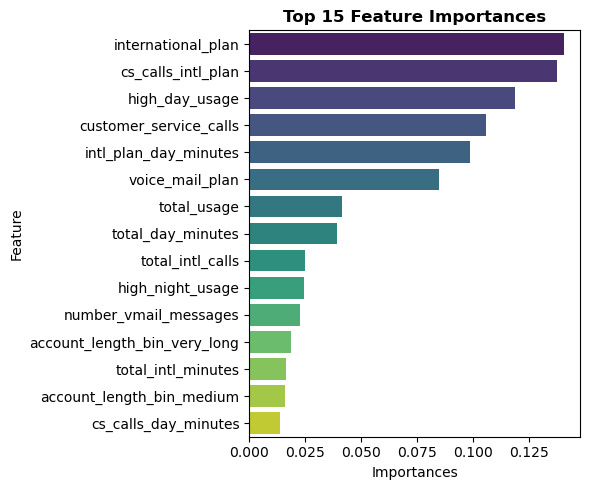

In [193]:
# Visualize the the importance features
plt.figure(figsize=(6,5))
sns.barplot(x="Importances", y="Feature", data=feat_imp.head(15), palette="viridis")
plt.title("Top 15 Feature Importances", fontsize=12, weight="bold")
plt.tight_layout()
plt.show()

Observation

- Most influential features are `international_plan`, `cs_calls_intl_plan`, `high_day_usage`, `customer_service_calls`.
- These highlight key areas where intervention can effectively reduce churn.

### **Final Recommendations**
 After thorough evaluation on multiple models, tuned XGBoost is the best model for predicting churn at ABC Telecommunication Company.Its performance metrics demonstrate high reliability and actionable insights:

1. **Target High-Risk Customers**
- Focus retention campaigns on customers with international plans, high usage and frequent service calls.
- Offer personalized incentives such as discounts, loyalty rewards, or plan adjustments.
2. **Enhance customer Service Experience**
- Quickly resolve issues for customers with multiple service calls.
- Train customer support teams to proactively address complaints to improve customer satisfaction.
3. **Review Plans and Pricing**
- Re-evaluate international calling plans and high-usage tariffs for competitiveness.
- Consider bundling services or offering long-term contract options to increase retention.
4. **Monitor High-Usage and At-Risk Segments**
- Train daytime and total usage metrics to flag potential dissatisfaction early.
- Use predictive modeling to proactive engage customers at risk of churning.
5. **Leverage Predictive Modeling for Continuous Improvement**
- Regularly retrain the XGBoost model to capture changing customer behavior.
- Use insights to guide marketing, product development and customer support strategies, maximizing customer loyalty and minimizing revenue.

Tuned XGBoost model delivers high predictive accuracy, effectrively isentifies churners and provides actionable insights. ABC Telecommunication Company can leverage these insights to design focused retention strategies, improve customer satisfaction and reduce revenue loss.